# Regression Analysis with Deep Learning in Tensorflow



## Getting Familiar with the Data

Data from a Kaggle data set:https://www.kaggle.com/harlfoxem/housesalesprediction will be used.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Feature Columns of dataset are as follows;


#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis & Feature Engineering

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.drop('id', axis = 1, inplace = True)
df.drop('zipcode',axis = 1, inplace = True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
df.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [8]:
df['bathrooms']=round(df['bathrooms'])
df['bedrooms']=round(df['bedrooms'])
df['floors']=round(df['floors'])

In [9]:
bath_bed = ['bathrooms', 'bedrooms']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[bath_bed[0]], df[bath_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,
0.0,1,2,0,1,0,0,0,0,0,0,0,0
1.0,167,1587,1800,327,43,6,1,0,0,0,0,0
2.0,28,1129,7186,4709,695,90,7,1,0,1,0,1
3.0,0,41,656,1219,506,88,7,6,2,1,1,0
4.0,0,1,182,601,321,72,17,4,3,0,0,0
5.0,0,0,0,19,22,12,2,1,0,1,0,0
6.0,0,0,0,6,13,2,2,1,0,0,0,0
7.0,0,0,0,0,1,0,1,0,0,0,0,0
8.0,0,0,0,0,0,2,1,0,1,0,0,0


In [10]:
con_grade = ['condition', 'grade']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[con_grade[0]], df[con_grade[1]]).style.background_gradient(cmap = cm)

grade,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,
1,0,1,9,11,6,2,0,0,0,0,0
2,0,4,15,59,75,13,2,2,0,0,0
3,0,12,100,1035,5229,4266,2041,921,332,73,11
4,0,10,84,685,2831,1394,446,156,56,13,2
5,1,0,34,248,833,390,126,55,11,3,0


In [11]:
water_cond = ['waterfront', 'condition']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[water_cond[0]], df[water_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
waterfront,,,,,
0,28,169,13929,5627,1681
1,1,1,91,50,20


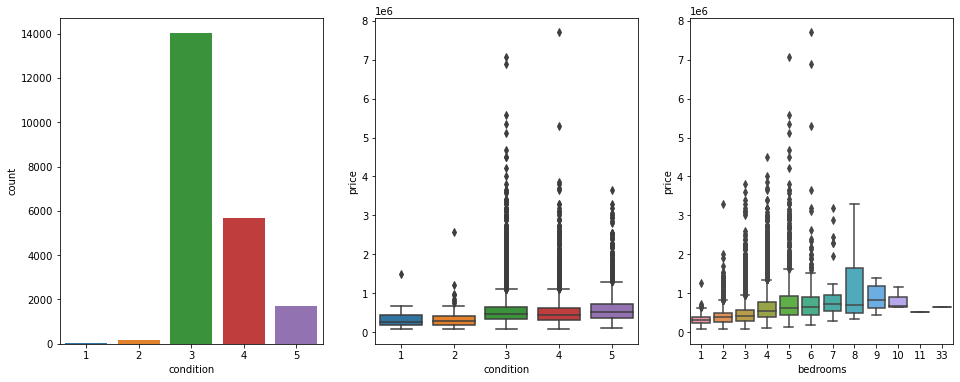

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(16,6))
sns.countplot(x='condition', data=df, ax=ax[0])
sns.boxplot(x='condition', y= 'price',data=df, ax=ax[1])
sns.boxplot(x='bedrooms', y='price', data=df, ax=ax[2]);
plt.show();

<Figure size 1152x720 with 0 Axes>

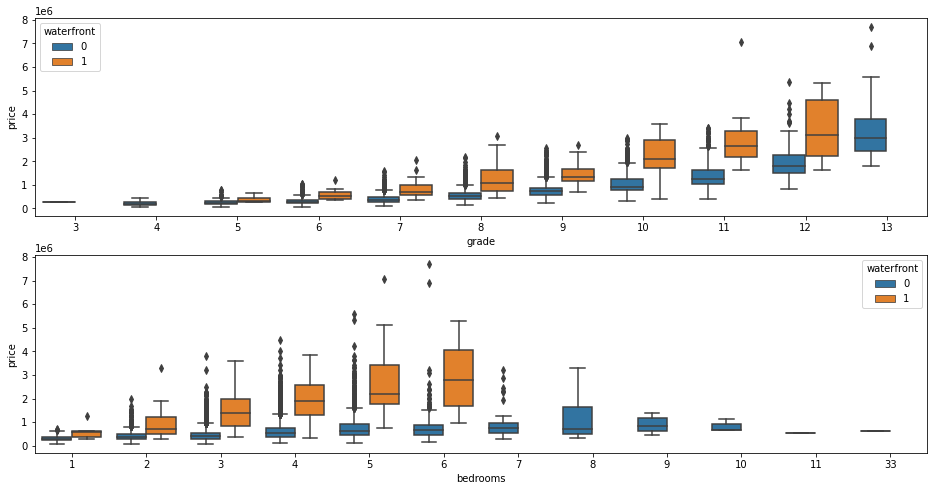

In [13]:
plt.figure(figsize=(16,10))
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.boxplot(x='grade', y='price', data=df, hue='waterfront',ax=ax[0])
sns.boxplot(x='bedrooms', y='price', data=df, hue='waterfront', ax=ax[1])
plt.show();

In [14]:
df.date=pd.to_datetime(df.date)
df['year']=df.date.apply(lambda date: date.year)
df['month']=df.date.apply(lambda date: date.month)
df.drop('date', axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


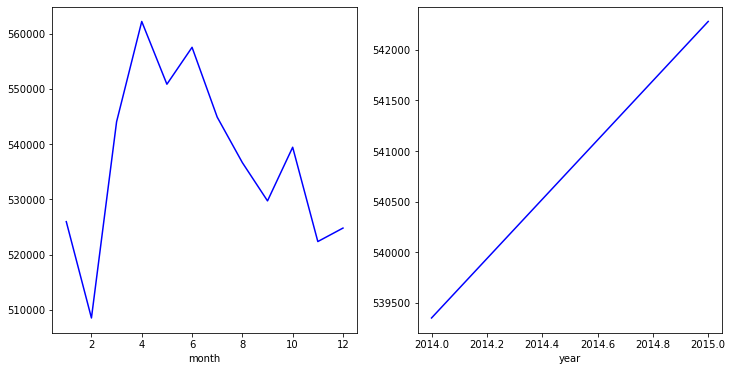

In [15]:
fig, ax = plt.subplots(1,2) 
df.groupby("month").mean()["price"].plot(ax=ax[0], figsize=(12,6),c="blue")
df.groupby("year").mean()["price"].plot(ax=ax[1], figsize=(12,6),c="blue");

In [16]:
df['house_age']=2015-df.yr_built
df.drop('yr_built', axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,2014,10,60
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,2014,12,64
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,2014,12,50
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,2015,2,28


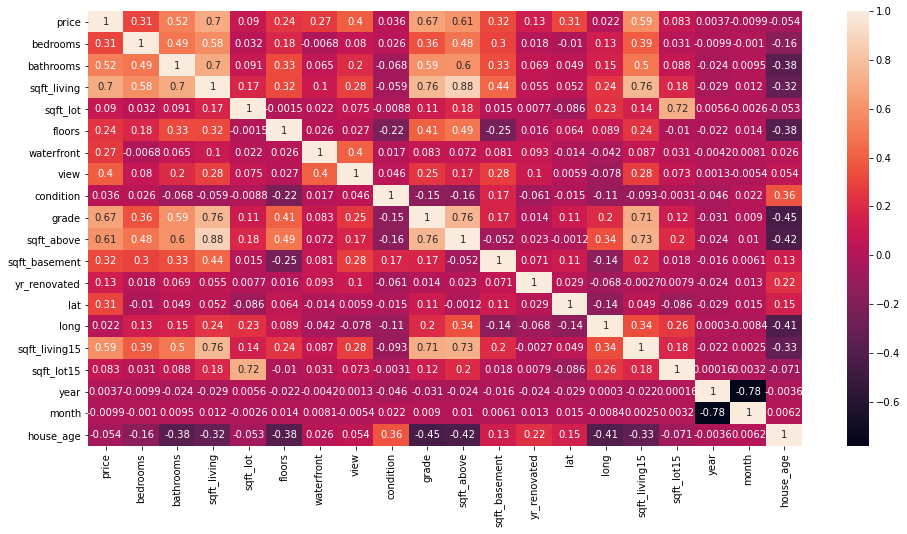

In [17]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr(),annot=True)
plt.show();

In [18]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.244832
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
house_age       -0.053953
Name: price, dtype: float64

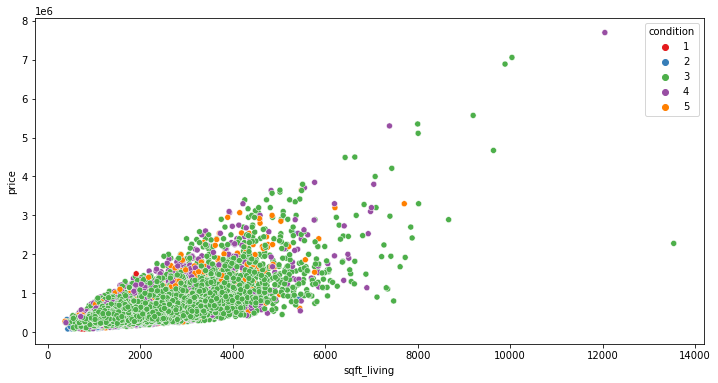

In [19]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['sqft_living'],y=df['price'],hue=df['condition'],palette='Set1')
plt.show();

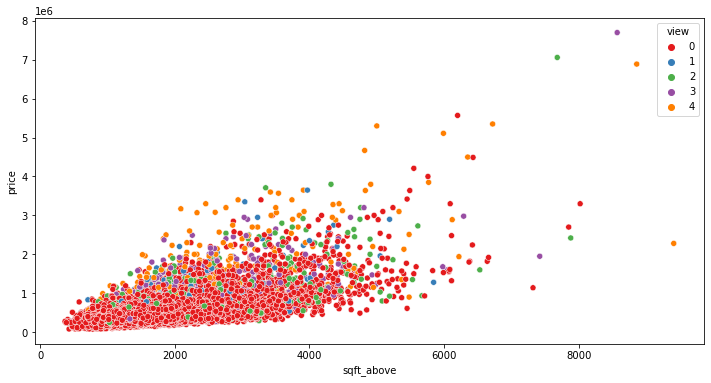

In [20]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['sqft_above'],y=df['price'],data =df, hue=df['view'],palette='Set1')
plt.show();

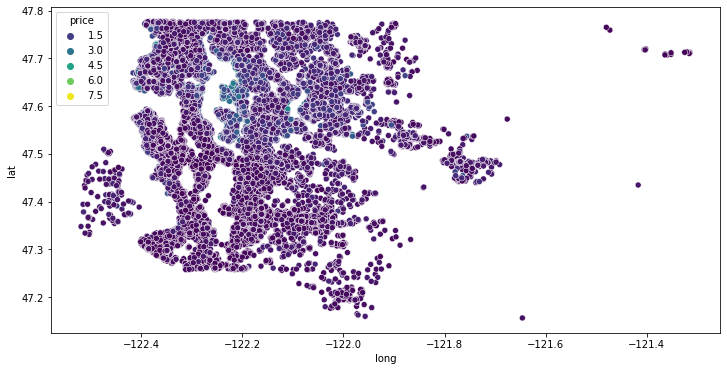

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis');

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,2014,10,60
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,2014,12,64
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,2014,12,50
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,2015,2,28


In [23]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
def renovate(x):
    if x > 0:
        x = 1
    return x
df["renovated"]=df["yr_renovated"].apply(renovate)
df.drop('yr_renovated', axis=1, inplace = True)
df.renovated.value_counts()

0    20683
1      914
Name: renovated, dtype: int64

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month,house_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,2014,10,60,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2014,12,64,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,2015,2,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,2014,12,50,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2015,2,28,0


In [26]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.244832
renovated        0.126082
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
house_age       -0.053953
Name: price, dtype: float64

## Model Development

### Train Test Split

In [27]:
X = df.drop('price',axis = 1).values
y = df['price'].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)

(15117, 19)
(6480, 19)


## Creating a Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [34]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=64,epochs=250)

Epoch 1/250
237/237 [==============================] - 2s 4ms/step - loss: 436715681224.0672 - val_loss: 415973867520.0000
Epoch 2/250
237/237 [==============================] - 0s 862us/step - loss: 402887561663.4622 - val_loss: 242226298880.0000
Epoch 3/250
237/237 [==============================] - 0s 875us/step - loss: 160933714763.2941 - val_loss: 98860244992.0000
Epoch 4/250
237/237 [==============================] - 0s 776us/step - loss: 102856568074.7563 - val_loss: 94951530496.0000
Epoch 5/250
237/237 [==============================] - 0s 827us/step - loss: 92955806573.7143 - val_loss: 90913923072.0000
Epoch 6/250
237/237 [==============================] - 0s 997us/step - loss: 90127621231.8655 - val_loss: 86555860992.0000
Epoch 7/250
237/237 [==============================] - 0s 798us/step - loss: 85268357670.7227 - val_loss: 82002706432.0000
Epoch 8/250
237/237 [==============================] - 0s 785us/step - loss: 79929251667.8992 - val_loss: 77243465728.0000
Epoch 9/250


237/237 [==============================] - 0s 955us/step - loss: 34958563431.2605 - val_loss: 35106394112.0000
Epoch 68/250
237/237 [==============================] - 0s 1ms/step - loss: 32564439298.1513 - val_loss: 34986438656.0000
Epoch 69/250
237/237 [==============================] - 0s 913us/step - loss: 32483714607.3277 - val_loss: 34913165312.0000
Epoch 70/250
237/237 [==============================] - 0s 997us/step - loss: 31655146857.4118 - val_loss: 34770927616.0000
Epoch 71/250
237/237 [==============================] - 0s 1ms/step - loss: 33535962086.1849 - val_loss: 34642227200.0000
Epoch 72/250
237/237 [==============================] - 0s 840us/step - loss: 33516528330.2185 - val_loss: 34583322624.0000
Epoch 73/250
237/237 [==============================] - 0s 769us/step - loss: 33194314769.2101 - val_loss: 34432782336.0000
Epoch 74/250
237/237 [==============================] - 0s 765us/step - loss: 33843184794.8908 - val_loss: 34304448512.0000
Epoch 75/250
237/237 [===

Epoch 133/250
237/237 [==============================] - 0s 842us/step - loss: 30011665700.5714 - val_loss: 31362902016.0000
Epoch 134/250
237/237 [==============================] - 0s 826us/step - loss: 31121515322.0840 - val_loss: 31381536768.0000
Epoch 135/250
237/237 [==============================] - 0s 823us/step - loss: 29635980227.7647 - val_loss: 31306403840.0000
Epoch 136/250
237/237 [==============================] - 0s 927us/step - loss: 29170341853.5798 - val_loss: 31313154048.0000
Epoch 137/250
237/237 [==============================] - 0s 1ms/step - loss: 30476431325.5798 - val_loss: 31307948032.0000
Epoch 138/250
237/237 [==============================] - 0s 1ms/step - loss: 28952370124.3697 - val_loss: 31275782144.0000
Epoch 139/250
237/237 [==============================] - 0s 1ms/step - loss: 30277516606.3866 - val_loss: 31332384768.0000
Epoch 140/250
237/237 [==============================] - 0s 1ms/step - loss: 30187533148.5042 - val_loss: 31154747392.0000
Epoch 14

Epoch 199/250
237/237 [==============================] - 0s 880us/step - loss: 27856580324.0336 - val_loss: 30280628224.0000
Epoch 200/250
237/237 [==============================] - 0s 899us/step - loss: 27713884293.3782 - val_loss: 30345807872.0000
Epoch 201/250
237/237 [==============================] - 0s 848us/step - loss: 29038733604.5714 - val_loss: 30245394432.0000
Epoch 202/250
237/237 [==============================] - 0s 1ms/step - loss: 28051778714.8908 - val_loss: 30228377600.0000
Epoch 203/250
237/237 [==============================] - 0s 927us/step - loss: 28820352869.1092 - val_loss: 30205003776.0000
Epoch 204/250
237/237 [==============================] - 0s 951us/step - loss: 28714073673.1429 - val_loss: 30374903808.0000
Epoch 205/250
237/237 [==============================] - 0s 991us/step - loss: 28112126674.8235 - val_loss: 30066309120.0000
Epoch 206/250
237/237 [==============================] - 0s 922us/step - loss: 29227700026.0840 - val_loss: 30112536576.0000
Ep

In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

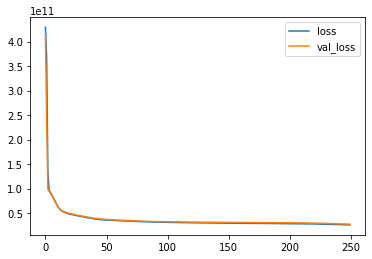

In [36]:
losses.plot()

In [45]:
losses.loss.idxmin() 

249

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [38]:
y_pred= model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.7922947328728656 
 mae: 99421.56488474151 
 mse: 27541399785.191284 
 rmse: 165956.01762271617


In [52]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(6480,)}
compare=pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
794,400000.0,651711.687500
4335,380000.0,411660.937500
4554,185000.0,283625.531250
3101,234000.0,208900.296875
4965,936000.0,904903.062500
1350,360400.0,516267.187500
3018,219000.0,235131.312500
3423,398950.0,399321.843750
4987,389950.0,357615.875000
5860,460000.0,409551.218750


### Predicting on Brand New Data

In [53]:
single_house = df.drop('price',axis=1).iloc[5]

In [54]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [55]:
model.predict(single_house)

array([[1309877.]], dtype=float32)

In [56]:
df.iloc[5]

price            1.230000e+06
bedrooms         4.000000e+00
bathrooms        4.000000e+00
sqft_living      5.420000e+03
sqft_lot         1.019300e+05
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.100000e+01
sqft_above       3.890000e+03
sqft_basement    1.530000e+03
lat              4.765610e+01
long            -1.220050e+02
sqft_living15    4.760000e+03
sqft_lot15       1.019300e+05
year             2.014000e+03
month            5.000000e+00
house_age        1.400000e+01
renovated        0.000000e+00
Name: 5, dtype: float64